# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entri

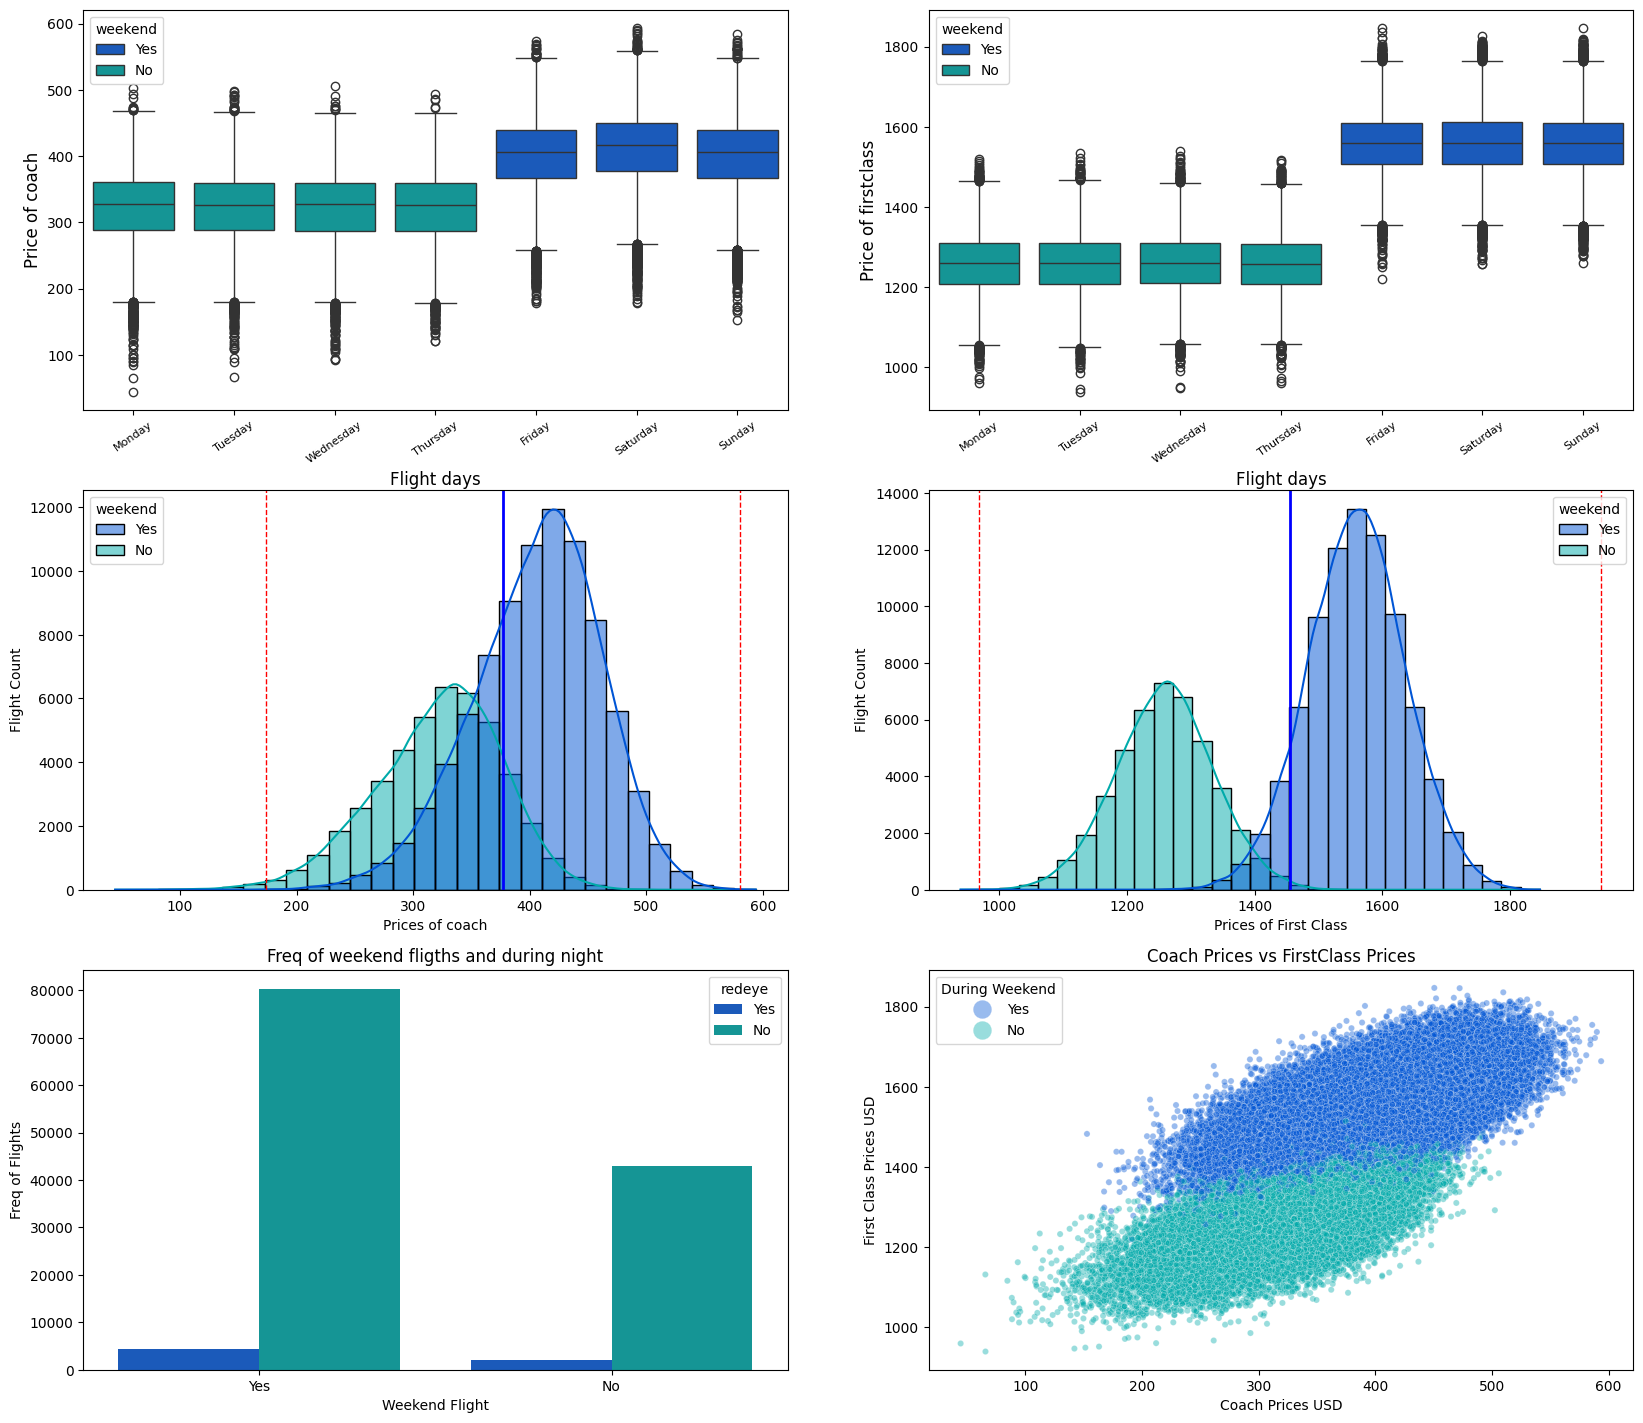

<Figure size 640x480 with 0 Axes>

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from pandas.plotting import lag_plot

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())
print(flight.info())
print(flight.describe(include='all'))

#order days of the week from monday to sunday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#calculate stats for coach and first class tickets
avg_coach = round(np.mean(flight.coach_price),2)
std_dev_coach = round(np.std(flight.coach_price),2)
avg_first_class = round(np.mean(flight.firstclass_price),2)
std_dev_fclass = round(np.std(flight.firstclass_price),2)
print(avg_coach)
print(std_dev_coach)

plt.figure(figsize=(20,20))
## Task 1
plt.subplot(3,2,1)
sns.boxplot(data=flight, x='day_of_week', y='coach_price', hue='weekend' , palette='winter', order=days_order )
plt.xticks(rotation=35, fontsize=8)
plt.xlabel('flight days', fontsize=12)
plt.ylabel('Price of coach', fontsize=12)

plt.subplot(3,2,2)
sns.boxplot(data=flight, x='day_of_week', y='firstclass_price', hue='weekend' ,palette='winter', order=days_order)
plt.xticks(rotation=35, fontsize=8)
plt.xlabel('flight days', fontsize=12)
plt.ylabel('Price of firstclass', fontsize=12)


plt.subplot(3,2,3)
sns.histplot(data=flight, x='coach_price',bins = 30, hue ='weekend', kde= True, palette='winter')
#plot average coach tickets and 6sigma deviations
plt.axvline(x=avg_coach, color='blue', linewidth=2)
plt.axvline(x=avg_coach+3*std_dev_coach, color='red', linewidth=1, linestyle='--')
plt.axvline(x=avg_coach -3*std_dev_coach, color='red', linewidth=1, linestyle='--')
plt.xlabel('Prices of coach')
plt.ylabel('flight Count')

plt.subplot(3,2,4)
sns.histplot(data=flight, x='firstclass_price', bins= 30, hue='weekend',kde= True, palette='winter')
#plot average first class tickets and 6sigma deviations
plt.axvline(x=avg_first_class, color='blue', linewidth=2)
plt.axvline(x=avg_first_class+3*std_dev_fclass, color='red', linewidth=1, linestyle='--')
plt.axvline(x=avg_first_class -3*std_dev_fclass, color='red', linewidth=1, linestyle='--')
plt.xlabel('Prices of First Class')
plt.ylabel('flight Count')

plt.subplot(3,2,5)
sns.countplot(data=flight, x='weekend', hue='redeye', palette='winter')
plt.title('Freq of weekend fligths and during night')
plt.xlabel('Weekend flight')
plt.ylabel('Freq of flights')

plt.subplot(3,2,6)
sns.scatterplot(data=flight, x='coach_price', y='firstclass_price', s=20, hue='weekend',palette = 'winter', alpha=0.4)
plt.title('Coach Prices vs FirstClass Prices')
plt.xlabel('Coach Prices USD')
plt.ylabel('First Class Prices USD')
plt.legend(title='During Weekend', markerscale=3)

#adjust space between graphs, widht, height and bottom spaces
plt.subplots_adjust(wspace = 0.2, hspace= 0.2, bottom = 0.2)
plt.show()
plt.clf()





## Analsys of the Ticket prices:
- The prices of the tickets vary depending on the day of the week. Both coach and first class have higher prices during the weekend. Coach tickets are most expensive on saturdays. 
- The average price of a coach ticket is 376.59 USD with a Std dev of 67.74 USD. 
- The minimum value of a coach ticket is 44 USD while the max value is 594 USD. 
- A flight ticket of 500$ is very high according to the data available. Even for a weekend ticket.

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

431.83
64.07


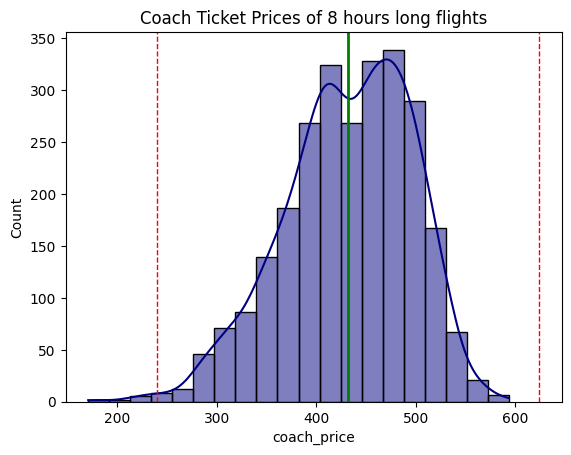

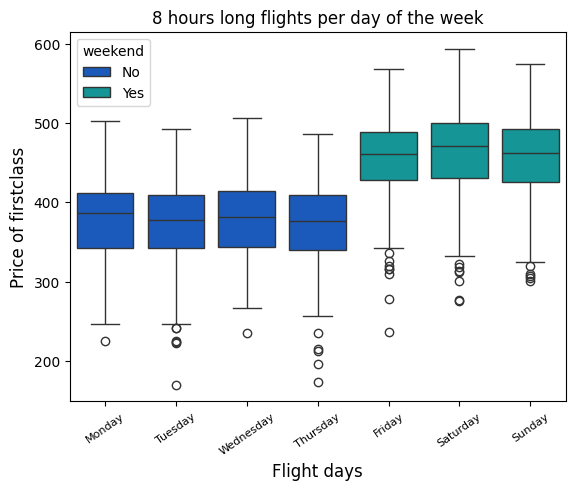

<Figure size 640x480 with 0 Axes>

In [70]:
## Task 2
coach_8hours = flight.coach_price[flight.hours == 8]
avg_coach_8hours = round(np.mean(coach_8hours),2)
std_coach_8hours = round(np.std(coach_8hours),2)
print(avg_coach_8hours)
print(std_coach_8hours)
sns.histplot(data=coach_8hours, bins = 20, kde=True, linewidth=1, color='navy')
plt.axvline(x=avg_coach_8hours, color='green', linewidth=2)
plt.axvline(x=[avg_coach_8hours+3*std_coach_8hours], color='red', linewidth=1, linestyle='--')
plt.axvline(x=[avg_coach_8hours-3*std_coach_8hours], color='red', linewidth=1, linestyle='--')
plt.title('Coach Ticket Prices of 8 hours long flights')
plt.show()
plt.clf()
#boxplot of flight that are 8 hours long only
sns.boxplot(data=flight[flight.hours == 8], x='day_of_week', y= 'coach_price',hue='weekend', palette='winter', order=days_order)
plt.xticks(rotation=35, fontsize=8)
plt.xlabel('flight days', fontsize=12)
plt.ylabel('Price of firstclass', fontsize=12)
plt.title('8 hours long flights per day of the week')
plt.show()
plt.clf()


## Analysis of 8 hours flight
- The average of 8 hours flight coach prices is 431,83 USD
- A ticket price of 500 USD is still quite high comparing with the distribution of the prices.
- The same trend is shown in flight tickets that have 8 hours as with data from all flight lengths.

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

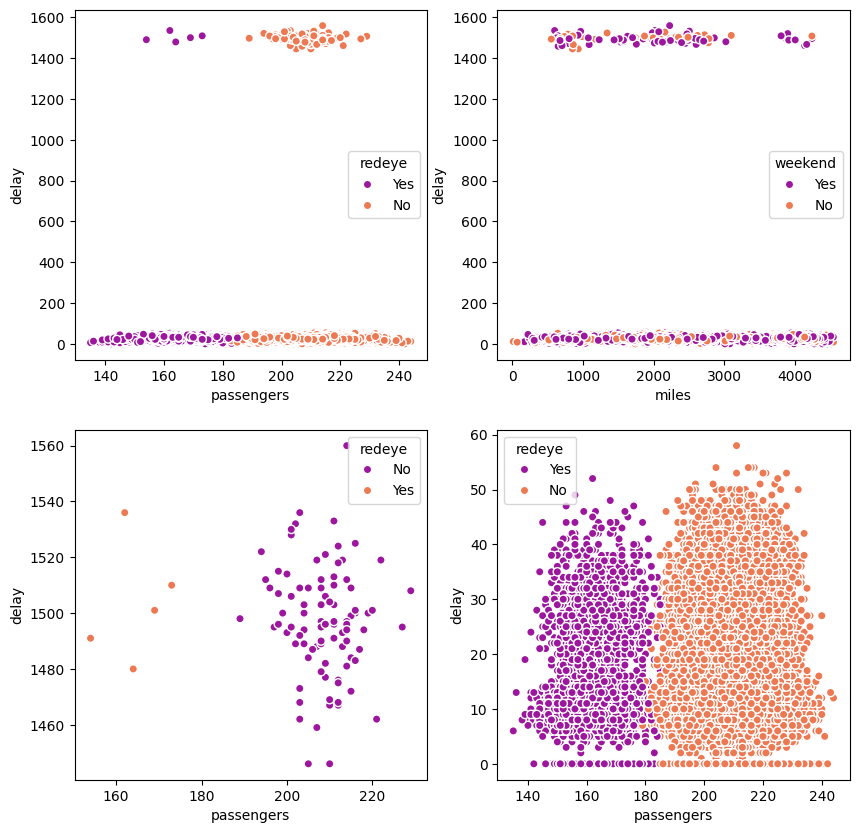

<Figure size 640x480 with 0 Axes>

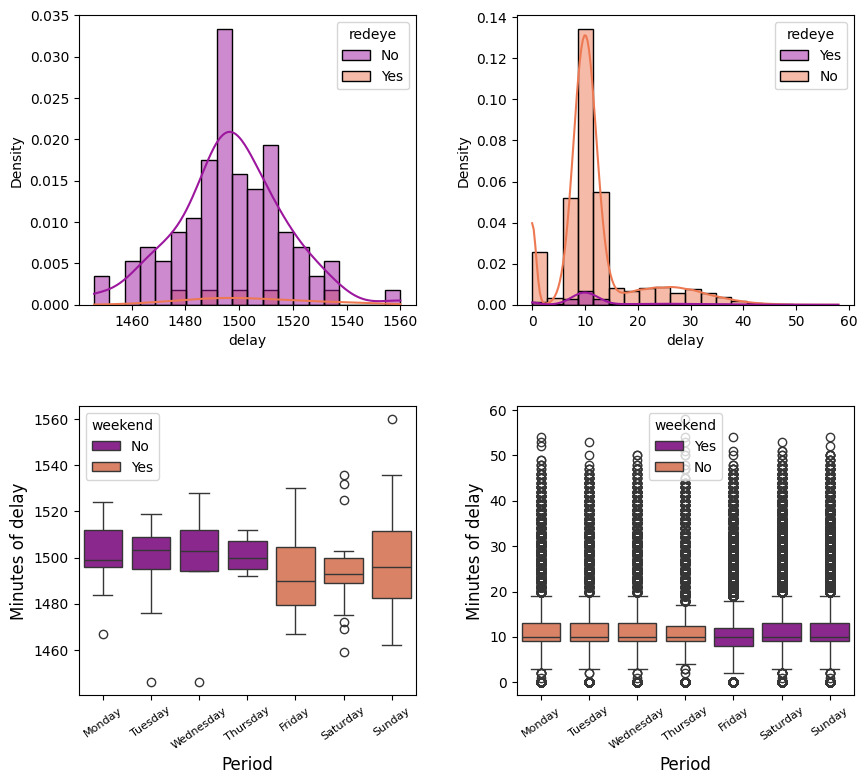

<Figure size 640x480 with 0 Axes>

In [79]:
## Task 3
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.scatterplot(data=flight, x='passengers', y='delay', hue='redeye', palette='plasma', linewidth=1)
plt.subplot(2,2,2)
sns.scatterplot(data=flight, x='miles', y='delay', hue='weekend', palette='plasma', linewidth=1)

#count plots
plt.subplot(2,2,3)
sns.scatterplot(data=flight[flight.delay>= 800], x='passengers', y='delay', hue='redeye', palette='plasma', linewidth=1)

plt.subplot(2,2,4)
sns.scatterplot(data=flight[flight.delay< 800], x='passengers', y='delay', hue='redeye', palette='plasma', linewidth=1)
plt.show()
plt.clf()

#divided histograms
#using stat density for normalized plots
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(data=flight[flight.delay>= 800], kde=True, x ='delay', hue='redeye',bins=20, palette='plasma', stat='density')

plt.subplot(2,2,2)
sns.histplot(data=flight[flight.delay<800], kde=True, x ='delay', hue='redeye', bins=20, palette='plasma', stat='density')
plt.subplots_adjust(wspace = 0.3, hspace= 0.35, bottom = 0.2)

plt.subplot(2,2,3)
sns.boxplot(data=flight[flight.delay>= 800],x='day_of_week', y='delay', hue='weekend', order=days_order, palette='plasma')
plt.xticks(rotation=35, fontsize=8)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Minutes of delay', fontsize=12)

plt.subplot(2,2,4)
sns.boxplot(data=flight[flight.delay< 800],x='day_of_week', y='delay', hue='weekend', order=days_order, palette='plasma')
plt.xticks(rotation=35, fontsize=8)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Minutes of delay', fontsize=12)

plt.show()
plt.clf()



## Analysis of the delayed flights
- It can be observed two large groups of delayed flights. the first group of delayed flights are under 60 min. the second group of flights are over 1400 minutes
- It can also be observed that it depends on the amount of passengers in the flight and if the flight is overnight or not. 
- The groups observed are:
    1. fligths below 180 passengers and delays over 1400 min that are overnight, this is the smallest group
    2. fligths over 180 passengers and delays over 1400 min that are not overnight, larger group but still small compared with the following two
    3. fligths below 180 passengers and delays less than 60 min that are overnight, the second largest groups in these clusters
    4. fligths over 180 passengers and delays less than 60 min that are not overnight, the largest group in these clusters
- The first priority to address missing connections is to either:
    1. Reduce the number of connecting fligths with passengers with more than 180 passengers and no redeye?
    2. Reduce the number of connecting flights with passengers that are less that 180 passengers but are overnight flights?
    3. Reduce delays in larger fligths with no redeye.
    4. Last prio is reduce overnight flight with less that 180 passengers  
- The long delays are normally distributed around 1500 min while the short delays are skewed to the right with a clear tendency. with and expected value around 10 min. 
- The delays are not dependant on the day of the week or if they are during the weekend or not but there is a larger spread among the long delay during the weekend.at the same time the mean delays seems to be a bit lower on the weekend. this trend is not observed in the short delays (less than 60 min) but the spread is very wide with many outliers outside the expected values.

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

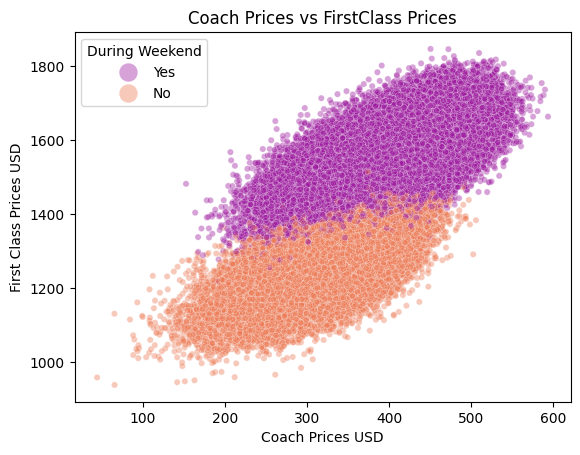

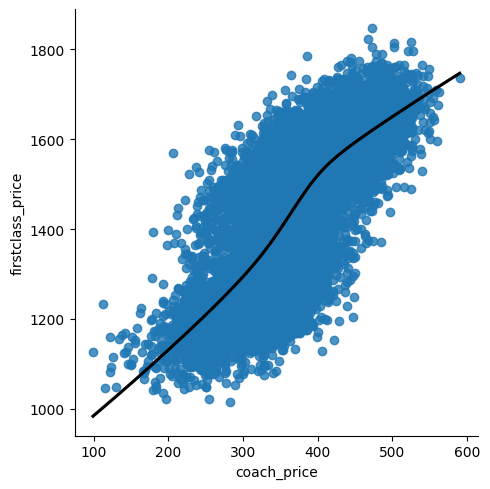

<Figure size 640x480 with 0 Axes>

In [88]:
## Task 4

sns.scatterplot(data=flight, x='coach_price', y='firstclass_price', s=20, hue='weekend',palette = 'plasma', alpha=0.4)
plt.title('Coach Prices vs FirstClass Prices')
plt.xlabel('Coach Prices USD')
plt.ylabel('First Class Prices USD')
plt.legend(title='During Weekend', markerscale=3)
#take a sample of the data and make a linear approximation
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

## Bivariate analysis of coach vs firstclass tickets  
- There is linear correlation between coach and firstclass tickets 
- Coach prices and firstclass prices are proportionally related. That means higher coach tickets are associated with higher firstclass tickets. 
- Additionally, analyzing prices between weeks days and weekend, it is observed that higher prices during the weekend is observed in both groups. 

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

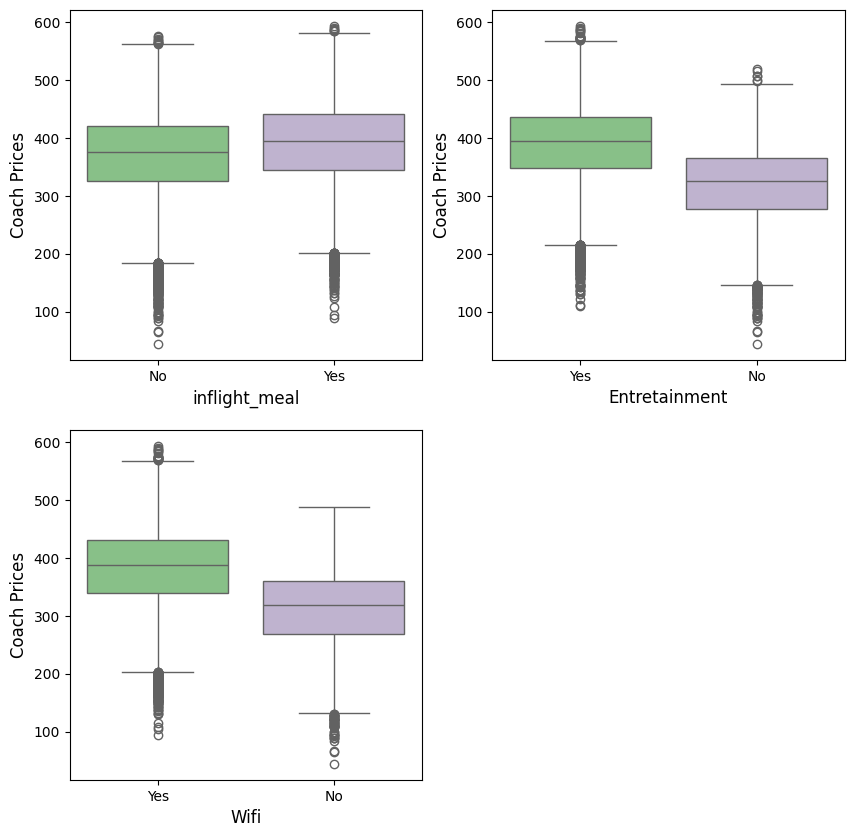

<Figure size 640x480 with 0 Axes>

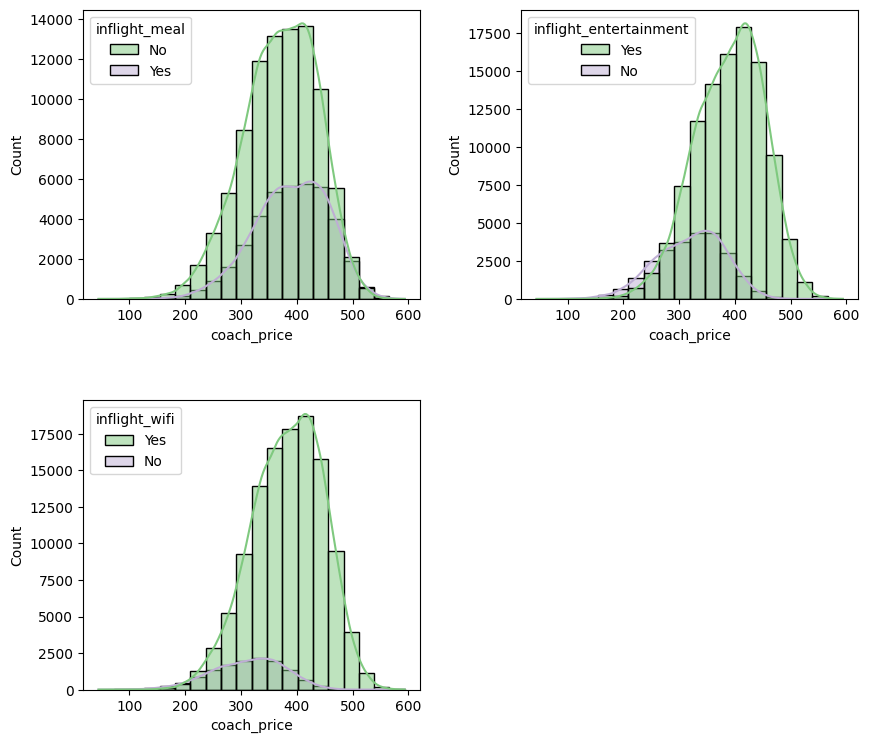

<Figure size 640x480 with 0 Axes>

In [81]:
## Task 5
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data=flight, x='inflight_meal', y='coach_price', hue ='inflight_meal', palette='Accent')
plt.xlabel('inflight_meal', fontsize=12)
plt.ylabel('Coach Prices', fontsize=12)

plt.subplot(2,2,2)
sns.boxplot(data=flight, x='inflight_entertainment', y='coach_price', hue='inflight_entertainment', palette='Accent')
plt.xlabel('Entretainment', fontsize=12)
plt.ylabel('Coach Prices', fontsize=12)

plt.subplot(2,2,3)
sns.boxplot(data=flight, x='inflight_wifi', y='coach_price', hue='inflight_wifi', palette='Accent')
plt.xlabel('Wifi', fontsize=12)
plt.ylabel('Coach Prices', fontsize=12)

plt.show()
plt.clf()

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(data=flight, x='coach_price', hue='inflight_meal', bins=20, kde=True, palette='Accent')
plt.subplot(2,2,2)
sns.histplot(data=flight, x='coach_price', hue='inflight_entertainment', bins=20, kde=True, palette='Accent')
plt.subplot(2,2,3)
sns.histplot(data=flight, x='coach_price', hue='inflight_wifi', bins=20, kde=True, palette='Accent')
plt.subplots_adjust(wspace = 0.3, hspace= 0.35, bottom = 0.2)
plt.show()
plt.clf()


## Analysis of the features on-board
- The add ons assciated with higher coach prices are entretainment and wifi. The expected values in the boxplots have a significant difference. On the other hand the meal does not have a observable difference.
- The price distribution between meals and no meals are very similar, the mean value almost overlapping. That is not the case for the wifi and ent features. the mean value of those tickets that dont have this uppgrades show a lower mean value and the distribution is slighly shifted to the left.

6. How does the number of passengers change in relation to the length of flights?

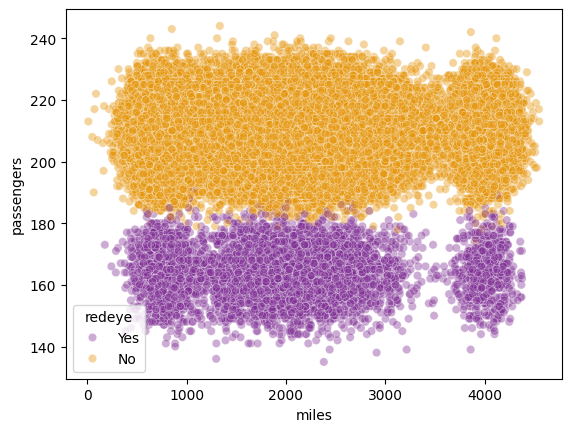

<Figure size 640x480 with 0 Axes>

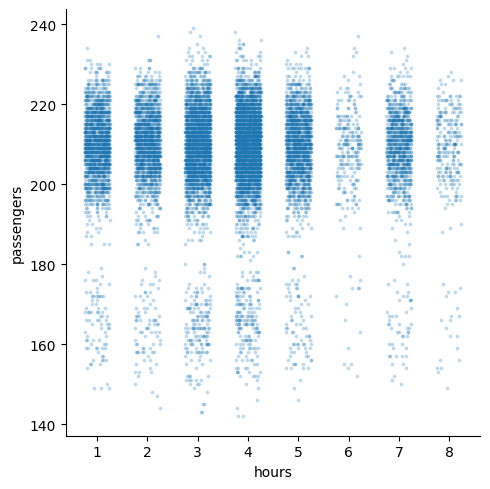

<Figure size 640x480 with 0 Axes>

In [92]:
## Task 6
sns.scatterplot(data=flight, x='miles', y='passengers', hue='redeye', palette="CMRmap", alpha=0.4)
plt.show()
plt.clf()
# Evaluate a linear regresion between a two integers
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 3, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

## Analysis of length vs number of passengers
- The scatter plot does not show any clear correlation between miles and passengers. However, the overnight flight have less passengers that passengers that flight during the day. 
- There is not much correlation between the miles and the amount of passengers 

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

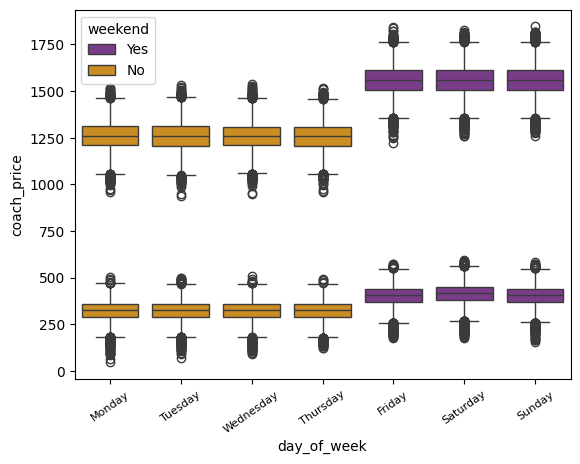

<Figure size 640x480 with 0 Axes>

In [45]:
## Task 7
sns.boxplot(data=flight, x='day_of_week', y='coach_price', hue='weekend' ,palette='CMRmap', order=days_order, legend=False)
sns.boxplot(data=flight, x='day_of_week', y='firstclass_price', hue='weekend' ,palette='CMRmap', order=days_order)
plt.xticks(rotation=35, fontsize=8)
plt.show()
plt.clf()

## Analysis of multivariate plots
- As shown in the previous analysis, the prices vary significantly between week days and weekends. Weekend flight tend to be more expensive than weekdays flights.
- The price difference between coach and firstclass can be as x10 times more. 
- Price differences betweeen days is not observed, very similar across all week days
- Same thing can be said about the weekend days, where no particular day has a higher price

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

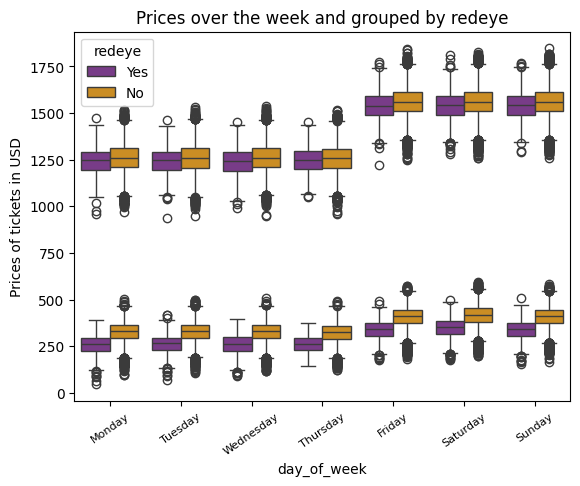

<Figure size 640x480 with 0 Axes>

In [82]:
## Task 8
sns.boxplot(data=flight, x='day_of_week', y='coach_price', hue='redeye' ,palette='CMRmap', order=days_order, legend=False)
sns.boxplot(data=flight, x='day_of_week', y='firstclass_price', hue='redeye' ,palette='CMRmap', order=days_order)
plt.xticks(rotation=35, fontsize=8)
plt.ylabel('Prices of tickets in USD')
plt.title('Prices over the week and grouped by redeye')
plt.show()
plt.clf()





## Analysis of overnight tickets with prices over the week
- While redeye tickets have a small difference between prices, the coach tickets show a significant difference betweeen prices. 
- Flight tickets that are no "redeye" or overnight tend to more expensive compared to those that are. This is evident accross all days of the week. This means that the price is not influenced by this variable. 